<a href="https://colab.research.google.com/github/NandiniMehta0603/Tensorflow/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Introduction to regression with neural network***

There are many definitons for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.



In [ ]:
 #Imprt tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


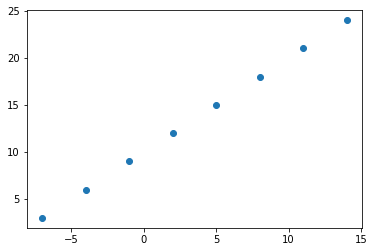

In [ ]:
#creating some data to view and fit
import numpy as np
import matplotlib.pyplot as plt
#create features 
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)


In [ ]:
y==X+10 #this is the relationship we want y to learn from X ie the dependent variables are learning from independent variables 

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input and the output shapes 
these shapes can vary and differ from each other depending upen the problem you are working upon

In [ ]:
#create a demo tensor for housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price
#ie the input shape is of 3 and output shape is 1...this means that 3 independent variables are predicting the value of 1 dependent variable

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]
input_shape=X[0].shape
output_shape=X[0].shape
input_shape,output_shape #this is giving an empty value is bec X[0] has 0 dimensions-these are simply scalars

((), ())

In [ ]:
#turn out numpy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32) #with data type =float 32
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

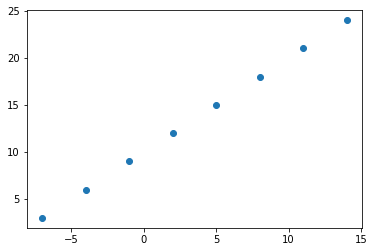

In [ ]:
plt.scatter(X,y)

###steps in modelling with tensorflow
1. creating a model-define the input and output layers, as well as hidden layers of a deep learning model'
2. compiling a model- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns and its learnings) and evaluate the metrics (what we can use to interpret the performance of our model)
3. Fitting a model- letting the model to try to find patterns between X and y (features and labels)

***steps***
1. get the data ready (turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
3. fir the model to the data and make a prediction
4. evaluate the model
5. improve through the experimentation
6. save and reload your trained model

In [ ]:
#set random seed
tf.random.set_seed(42)

#1.create a model using the sequential API
#sequential groups a linear stack of layers into tf.keras.model
#sequential provides training and inference features on this model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae, #mae is for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #optimizer tells how to improve the neural system
              metrics=["mae"]) #SGD is stochastic gradient descent...also you can use abbeviation functions in strings 

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #epochs means you have 5 opppourtunities to train the model
#epoch 1/5 etc represents various different lapse of model
#next 0s represents how much time it took
#loss function- how wrong the model is and slowly it improves

Epoch 1/5
1/1 [==============================] - 1s 537ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#check out X and y...to chec if the model can give us results
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#try and make a prediction using our model...till now we were just training the model
model.predict([17.0]) #on average our model predcits according to the loss value...thats why it is giving slightly off values  

1/1 [==============================] - 0s 77ms/step


array([[12.716021]], dtype=float32)

###improving our model and reducing errors
####we can improve our model; by altering the steps we took to create a model
1. construct or import a pretrained model relevant to your problem
2. compile the model(prepare it to be used with data)
-> loss- how wrong your model's predictions are compared to the truth labels(you want to minimize this)
-> optimizer- ow your model should update its internal patterns to better its predictions
->metrics- human interpretable values for how well your model is doing
3. fit the model to the training data so it can discover patterns
->epochs- how many times the model will go through all of the training examples
4. evaluate the model on the test data (how reliable are our model's predictions)

1. **creating a model** here we might add more layers, increase the number of hidden units( all called neurons) within each of the hidden layers, change the activation function of each layer
2. ** compiling a model** here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **fitting a mode** here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples for training)

### **improving the model**
1. adding more number of hidden layers
2. increasing the number of hidden units
3. changing the activation function
4. change the optimization function (like use adam function)
5. change the learning rate (precision increases)- very imp parameter
6. fitting for longer

In [ ]:
#lets rebuild our model

#1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model (this time we'll tarin for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) #by increasing the no of epochs, we have decreased our loss from 11 to 6 

Epoch 1/100
1/1 [==============================] - 0s 285ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6

In [ ]:
#remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#lets see if our model's predictions has improved 
model.predict([17.0]) #the predicted value now is much closer to the actual value

1/1 [==============================] - 0s 149ms/step


array([[29.739855]], dtype=float32)

In [ ]:
#lets alter another parameter - by adding either hidden layers or maybe by changing the optimizer to adam
#lets move towards creating a larger model
#its not necessary to add 10 idden layers
#its always preferable to add many small changes rather than big ones 
#1. create the model with an extra hidden layer
mdel=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"), #only differene from tje previous model is adding this extra hidden layer
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the data
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

#by just adding a hidden layer we have reduced our mae to half

Epoch 1/100
1/1 [==============================] - 0s 293ms/step - loss: 6.8812 - mae: 6.8812
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8756 - mae: 6.8756
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8700 - mae: 6.8700
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8644 - mae: 6.8644
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8588 - mae: 6.8588
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8531 - mae: 6.8531
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8475 - mae: 6.8475
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8419 - mae: 6.8419
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8363 - mae: 6.8363
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8306 - mae: 6.8306
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 6.82

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 123ms/step


array([[30.489859]], dtype=float32)

for example if we add more hidden layers, it may make the model overfit and the predicted value may then be larger than actual value- **problem of overfitting**

###Evaluationg a model
it is how good our model is at predicting values from unseen data. In practice a typical workflow you'll go through when building neural networks is:
```
Build a model->fit it->evaluate it->tweak the model->fit it->evaluate it->tweak the model->fit it->evaluate it...
```

#when it comes to evalutation..there are 3 words you should memorize:
"visualize,visualize,visualize"
it's a good idea to visualize:
* the data- what data are we working with? what does it look like?
* The model itself- what does our model look like?
* The training of a model- how does a model perform while it learns?
* the predictions of the model- how do the predictions of a model line up against the ground truth (the original data labels)?


In [ ]:
# make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

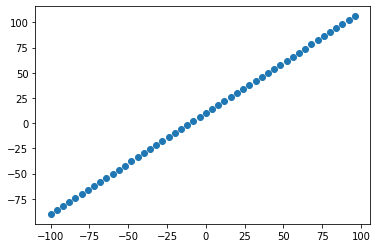

In [ ]:
#visualise the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### using 3 sets...ie splitting data set into training,testing and validating sets
* training set-the model learns from this data...typically 70-80% of the total data set
* validation set-the model gets tuned on this data, which is typically 10-15% of the total data available
* Test set- the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available
we do this splitting to do generalisation. the ability for a machine learning model to predict values on unseen data

In [ ]:
#check the length of how many samples we have
len(X)

50

In [ ]:
#split the data into train and test sets
X_train=X[:40] #first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:] # last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

###visualising the data
now we've got the data in training and test sets...let's visualise it again


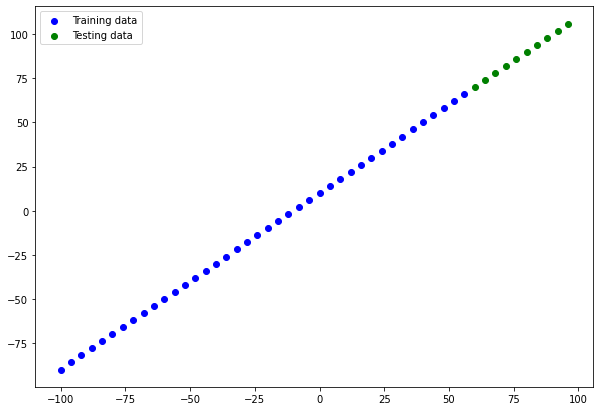

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#show a legend
plt.legend()

###lets have a look at how to build a neural network for our data

In [ ]:
#create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6049 - mae: 8.6049
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4695 - mae: 10.4695
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9015 - mae: 10.9015
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4167 - mae: 9.4167
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.3042 - mae: 10.3042
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5497 - mae: 9.5497
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6695 - mae: 8.6695
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0480 - mae: 9.0480
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0087 - mae: 19.0087
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2539 - mae: 10.2539
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - los

In [ ]:
###Visualising the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#lets create a model whic builds automatically by defining the input_shape parameter
import tensorflow as tf
tf.random.set_seed(42)

#create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]) #1 bec we are using 1 number to predict 1 number
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [ ]:
model.summary()
#output shape=1 represents that 1 output is predicted
#Dense here means that it is a fully connected network..directly connected


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params- total number of parameters in the model ie the relationship between X and y here
* Trainable params(learnable params)- these are the parameters(patterns) the model can update as it trains
* non-trainable params- when further while coding, we want to freez some params, those are called non trainable params...we want to them to keep some patterns...these aren't updated while training, happens when you bring in already learned patterns or params from other models during **transfer learning**

###Weights and biases



In [ ]:
#let's fit our model to the training data
model.fit(X_train,y_train,epochs=100,verbose=1)

#vebose: 0/1/2. verbosity mode
#0=silent, 1=progress bar, 2=one line per epoch
#note that progress bar is not particularly useful when logged to a file


Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


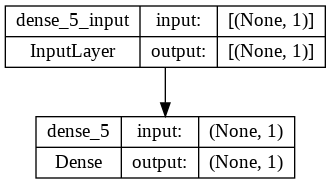

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [ ]:
#visualizing more
#1. let's create the model
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layers"),
    tf.keras.layers.Dense(1,name="Output_layer")
],name="model_1")

#2. compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
#3. fir the model to the training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


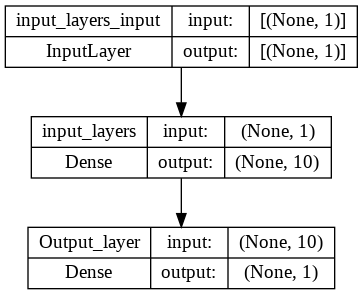

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

###Visualizing our model's prediction
to visualise predictions, it's good idea to plot them against th ground truth labels.

often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions)

In [ ]:
#make some predictions 
y_pred=model.predict(X_test)
y_pred #same format as y_test
#if our model learns perfectly then y_pred will be equal to y_true

1/1 [==============================] - 0s 55ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

**note:** this is just a practice...it's always a good idea to turn into function

In [ ]:
#let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  #plo tarining data, test data and compare predictiosn to the ground truth labels

  plt.figure(figsize=(10,7))
  #plot the training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot the testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  #plot model's predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  #show the legend
  plt.legend();

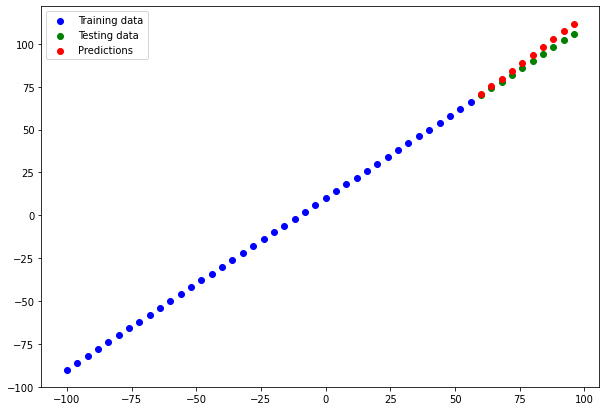

In [ ]:
plot_predictions() #ideally the red and green should have been in a single straight line

###evaluating our model's predictions with regression evluation metrics
* the red and green line which may give significant error depending upon thee scale, can be brought up closer wih the help of various changes in the metrics like SGD function or optimizers etc.
* depending on the problem you're wrking on, there will be different evaluation metrics to evaluate your model's performance.
 since we're working on a regression problem, two of the main metrics are:
* MAE- mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE- mean square error, "square the average error" **use when- larger errors are more significant than smaller errors** as it will amplify the larger values with the help of square
* Huber- combination of mse and mae- basically less sensitive to outliers than mse.

In [ ]:
#evaluate the model on the test
model.evaluate(X_test,y_test) #while compiling the loss and metrics were equal to mae so the result is mean absolute error

1/1 [==============================] - 0s 135ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [ ]:
#calculate the mean absolute error
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#calculate mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred) #here we have converted it into a tensor
#our y_pred tensor has an extra dimension than y_test

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred) #now both of them have same dimensions

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [ ]:
#calculate the mean absolute error now
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [ ]:
#calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                  y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [ ]:
#make some functions to reuse mae and mse
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=y_pred)


###running experiments to improve our model

```
Build the model->fit it->evaluate it->build it->fit it->evaluate it

```
####Experiment experiment experiment
1. Get more data-get more examples for your model to train on (more opportunitites to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model)- this might come in the from of more layers or more hidden units in each layer
3. Train for longer- give your model more of a chance to find patterns in the data

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

###modelling experiments
1. `model_1`-same as the original model, 1 layer, trained for 100 epochs--baseline model
2. `model_2`- 2 layers, trained for 100 epochs
3. `model_3`- 2 layers, trained for 500 epochs

In [ ]:
#**Build model 1**
#set random seed
tf.random.set_seed(42)

#1. create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

1/1 [==============================] - 0s 59ms/step


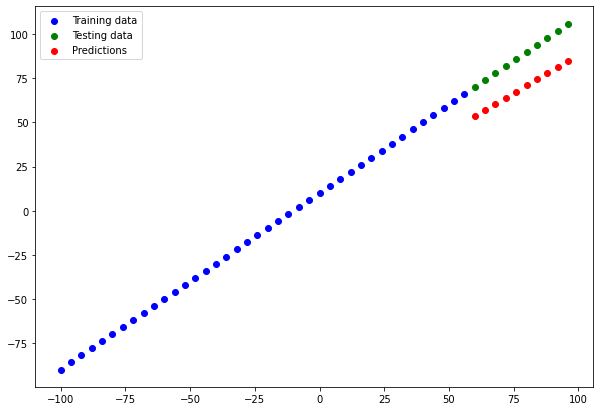

In [ ]:
#make and plot predictions for our model_1
y_pred_1=model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)
#there are fairly very large differences between actual and predicted values 


In [ ]:
#improvising the above code
#calculate model_1 evaluation metrics
mae_1=mae(y_test,tf.squeeze(y_pred_1))
mse_1=mse(y_test,tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
# set the random seeds
tf.random.set_seed(42)

#1.create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3. fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [=====================

1/1 [==============================] - 0s 88ms/step


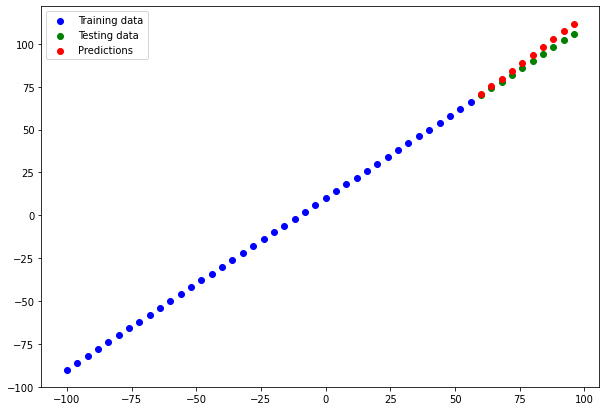

In [ ]:
y_pred_2=model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
        10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
       dtype=float32)>, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([436.42627, 297.38196, 200.43198, 145.57669, 132.81555, 162.14896,
        233.57661, 347.09875, 502.7155 , 700.4262 ], dtype=float32)>)

###build model 3
* 2layers, trained for 500 epochs

In [ ]:
#set random seed
tf.random.set_seed(42)

#1. create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)


Epoch 1/500


In [ ]:
y_pred_3=model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
#calculate model_3 evaluation metrics
mae_3=mae(y_test,y_pred_3)
mse_3=mse(y_test,y_pred_3)
mae_3,mse_3

**Note** you should always start with small experiments (small models) and make sure they fit well and then go on to expanding on with large models

###Comparing the results of our experiments
We've run a few experiments, let's compare the results

In [ ]:
#let's compare the or model's results using a pandas dataframe
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

In [ ]:
model_2.summary()

* machine learning experiments are all about trying many different models and experimenting with all of them and then taking out which model performs the best/doesn't perform good at all according to our requirements.
* here it looks like model_2 performed the best
* one of the goal can be to minimize the time between your experiments. The more experiments you do, the more things you figure out which don't work and in turn you will get closer to what works best. Experiment, experiment, experiment.

###Tracking your experiments

* one really good habit is to track the results of your experiments
* it can be tedious when we are running lots of experiments...there are several tools to help us in this.
* many of the tools are-
1. tensorboard- component of tensorflow library to help track modelling experiments (very important)
2. weights and biases- a tool for tracking all kinds of machine learning experiments(plugs straight into tensorboard)

##Saving a model
saving our models allows us to use them outside of google colab or wherever they were trained at. 
the saved model format is another way to serialize models. models saved in this format can be restored using **tf.keras.models.load_model** and are compatible with tensorflow serving.

##HDF5 format
keras provides a basic save format using HDF5 standard.

In [ ]:
#save a model using the savedmodel format
model_2.save("best_model_SavedModel_format") #this gets save in a folder
#the model weights
# the state of the optimizer, allowing to assume training exactly where you left.
#this allows you to save the entirety of the state of a model in a single file

###also save in hdf5 standard format
* hierarchivcal data format-

In [ ]:
#save model using the HDF5 format
model_2.save("best_model_HDF5_fromat.h5") #in this form we get a single file

###loading-
we use the same method to load both saved and hdf5 saved formats

In [ ]:
##loading in a saved model
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

In [ ]:
model_2.summary() #this is the same as loaded_model

In [ ]:
#compare model_2 predictions with savedModel format model predictions
model_2_pred=model_2.predict(X_test)
loaded_SavedModel_format_pred=loaded_SavedModel_format.predict(X_test)
model_2_pred==loaded_SavedModel_format_pred


In [ ]:
mae(y_true=y_test,y_pred=model_2_pred)==mae(y_true=y_test, y_pred=loaded_SavedModel_format_pred)

In [ ]:
model_2_pred.squeeze()

In [ ]:
loaded_SavedModel_format_pred.squeeze()

In [ ]:
#load the model using .h5 format
loaded_h5_model=tf.keras.models.load_model("/content/best_model_HDF5_fromat.h5")
loaded_h5_model.summary()

In [ ]:
#check to see if loaded .h5 model predictions match model_2
model_2_pred=model_2.predict(X_test)
loaded_h5_model_pred=loaded_h5_model.predict(X_test)
model_2_pred==loaded_h5_model_pred

###download a model (or any other file) from google colab
1. you can go to the "files" and download the files from there
2. Use code (see the cells below)
3. you can save it to google drive and copying it there 

In [ ]:
#dlownload a file from google colab
from google.colab import files 
files.download("")

In [ ]:
#save a file from google colab to drive 
!cp /..(from) /..(to path name)

##a larger example

In [ ]:
#import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib .pyplot as plt

In [ ]:
#read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
insurance["sex"]

In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()
#let's try one-hot encode our dataframe so it's numbers in all columns

In [ ]:
#create X and y (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
#view X
X.head()

In [ ]:
#view y
y.head()

In [ ]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

In [ ]:
#build a neural network (sort of like the above models)
tf.random.set_seed(42)

#1. create the model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
#check the result of the insurance model on the test data
insurance_model.evaluate(X_test,y_test) #the mae defines the average loss 

In [ ]:
y_train.median(), y_train.mean()

* right now ur model is substantially wrong
### we have to improve the model now
to try improve our model, we'll run 2 experiments
1. add an extra layer with hidden units
2. train for longer
3. (improvise more by experiments)

In [ ]:
#set random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10), #our model now has more potential to learn
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose=1)

In [ ]:
#evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

In [ ]:
insurance_model.evaluate(X_test,y_test)

##adding more improvisations

In [ ]:
#set random seeds
tf.random.set_seed(42)

#1. create the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model
history=insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

In [ ]:
#evaluate the third model
insurance_model_3.evaluate(X_test,y_test)

In [ ]:
insurance_model.evaluate(X_test,y_test)

In [ ]:
#plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
#this decrease is actually indicating that our model's loss is increasing

**How long should you train the model**
It depends..Really..it depends on the problem we are working on. However many people have asked this question, so tensorflow has a solution- **the early stopping callback** which is a tensorflow component you can add to your model once it stops improving at a certain metric

##Preprocessing data-Normalisation and standardization
**note** neural networks prefer normalisation
* normalisation is a technique as part of data preprocessing for machine learning- it is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the range of values.

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["bmi"].plot(kind="hist")

If we want both of them to be plotted on the same scale

In [ ]:
X["children"].value_counts()

##Feature scaling
* scale(also called normalisation)
* converts values between 0 and 1 whilst preserving the original distribution
* MinMaxScaler
* use as default scaler with neural networks

----
* standardization
* removes the mean and divides each value by the standard deviation
* StandardScaler
* transform a feature to have close to normal distribution (caution: this reduces the effect of outliers)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#read the insurance dataframe
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #trun all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#create X and y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#build our train and test series 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform the training and test data with normalisation
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
#what does our data look like
X_train.loc[0]

In [ ]:
X_train_normal[0] #this is the updated training data actually looks like 

In [ ]:
X_train.shape, X_train_normal.shape

###now our data is ready and normalised and one hot encoded and now we can build a neural network model on normalised data

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile he model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),\
                          metrics=["mae"])

# 3. fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

In [ ]:
#evaluate our insurance model trained on normalised data
insurance_model_4.evaluate(X_test_normal,y_test)

In [ ]:
insurance_model_4.summary()